<a href="https://colab.research.google.com/github/mohamed3kane/orie4580-hw2/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 3

#### Students: Marco La Vecchia (mal426) & Mohamed Kane (mek298)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
import numpy as np
import matplotlib.pyplot as plt

def plot_clock_face(m, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.
    """
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize=8)
        if annotate:
            plt.annotate(str(i), (1.1*np.sin(theta), 1.1*np.cos(theta)))

def plot_clock_path(m, seq, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.
    """
    for i in range(len(seq) - 1):
        theta_start = 2.0 * np.pi * seq[i] / m
        theta_end = 2.0 * np.pi * seq[i+1] / m
        x_start, y_start = np.sin(theta_start), np.cos(theta_start)
        x_end, y_end = np.sin(theta_end), np.cos(theta_end)
        plt.arrow(x_start, y_start, x_end-x_start, y_end-y_start,
                  length_includes_head=True, head_width=0.05, head_length=0.1,
                  fc=color, ec=color)

In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG_custom(n, m, a, seed=1):
    """
    Generate a pseudorandom sequence using a simple LCG (no increment).

    Parameters:
    n (int): Number of pseudorandom numbers to generate
    m (int): Modulus
    a (int): Multiplier
    seed (int): Initial seed

    Returns:
    numpy.ndarray: Sequence of integers in [0, m-1]
    """
    output = np.zeros(n, dtype=int)
    x = seed
    for i in range(n):
        output[i] = x
        x = (a * x) % m
    return output

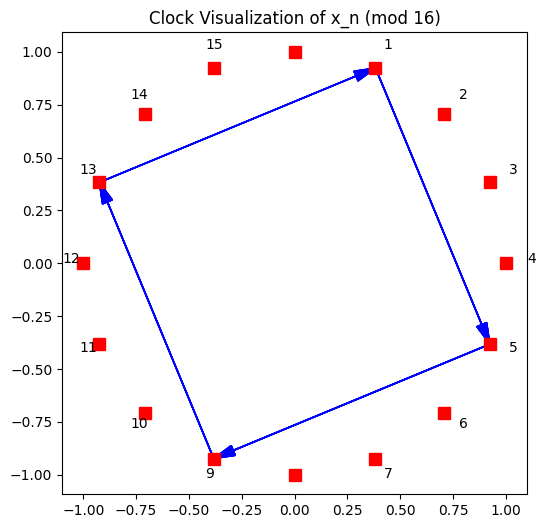

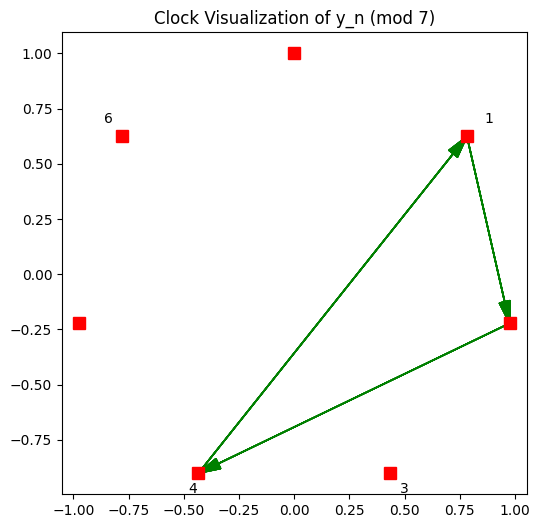

In [ ]:
# Ans
# Generate sequences
xn = LCG_custom(20, m=16, a=5, seed=1)  # Sequence for x
yn = LCG_custom(20, m=7, a=2, seed=1)   # Sequence for y

# Plot for x_n
plt.figure(figsize=(6,6))
plot_clock_face(16, annotate=True)
plot_clock_path(16, xn, color='b')
plt.title("Clock Visualization of x_n (mod 16)")
plt.axis("equal")
plt.show()

# Plot for y_n
plt.figure(figsize=(6,6))
plot_clock_face(7, annotate=True)
plot_clock_path(7, yn, color='g')
plt.title("Clock Visualization of y_n (mod 7)")
plt.axis("equal")
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

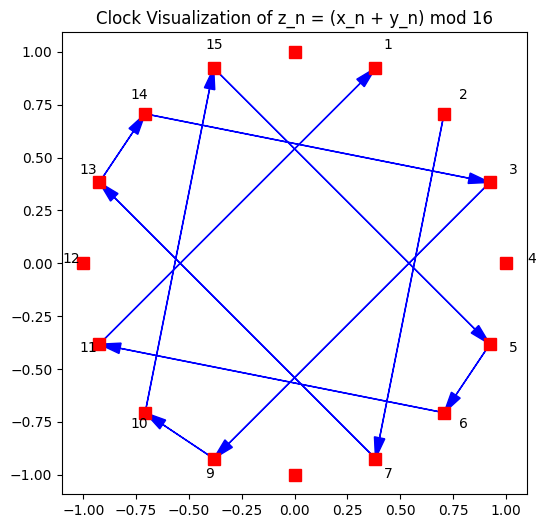

In [ ]:
# Ans for (b)

# Base LCG parameters
m1, a1, x0 = 16, 5, 1     # x_{n+1} = (5 x_n) mod 16
m2, a2, y0 = 7,  2, 1     # y_{n+1} = (2 y_n) mod 7

# Generate until both bases return to their seeds (full combined cycle)
xn_vals = [x0]
yn_vals = [y0]
x, y = x0, y0
while True:
    x = (a1 * x) % m1
    y = (a2 * y) % m2
    if x == x0 and y == y0:
        break
    xn_vals.append(x)
    yn_vals.append(y)

xn_vals = np.array(xn_vals, dtype=int)
yn_vals = np.array(yn_vals, dtype=int)

# Combined generator: z_n = (x_n + y_n) mod 16
zn = (xn_vals + yn_vals) % m1

# Plot z_n on a mod-16 clock
plt.figure(figsize=(6,6))
plot_clock_face(m1, annotate=True)
plot_clock_path(m1, zn, color='b')
plt.title("Clock Visualization of z_n = (x_n + y_n) mod 16")
plt.axis("equal")
plt.show()


___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.
- The period of $x_{n}$ is **4**
- The period of $y_{n}$ is **3**
- The period of $z_{n}$ is **12**




___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.



To get the pseudoinverse of
$$
F^{-1}(y) = \inf \{ x : F(x) \geq y \}.
$$



**Step 1: Analyze the CDF $F(x)$:**

$$
F(x) =
\begin{cases}
0, & x < 0, \\
x, & 0 \leq x < \tfrac{1}{2}, \\
\tfrac{1}{2}, & \tfrac{1}{2} \leq x < 1, \\
1, & x \geq 1.
\end{cases}
$$

- On $[0, 0.5)$: $F(x)=x$ increases linearly.  
- On $[0.5, 1)$: $F(x)=0.5$ is flat.  
- At $x=1$: jump from $0.5$ to $1$.  
- Range: $[0,0.5] \cup \{1\}$.



**Step 2: Case analysis for $F^{-1}(y)$:**

1. For $0 < y < 0.5$:  
   Since $F(x)=x$ on $[0,0.5)$, the smallest $x$ with $F(x)\ge y$ is $x=y$.  
   $$
   F^{-1}(y)=y.
   $$

2. For $y=0.5$:  
   $\{x : F(x)\ge 0.5\} = [0.5,\infty)$.  
   The infimum is $0.5$.  
   $$
   F^{-1}(0.5)=0.5.
   $$

3. For $0.5 < y \le 1$:  
   Only at $x\ge 1$ do we get $F(x)\ge y$.  
   The infimum is $1$.  
   $$
   F^{-1}(y)=1.
   $$



**Step 3: $y=0$:**

- Strictly with the definition, $\{x:F(x)\ge 0\}=(-\infty,\infty)$, so $\inf=-\infty$.  
- set $F^{-1}(0)=0$.  


**Therefore:**

$$
F^{-1}(y)=
\begin{cases}
y, & 0<y\le \tfrac12, \\
1, & \tfrac12 < y \le 1,
\end{cases}
$$

with $F^{-1}(0) = -\infty \ \text{(or 0, depending on convention)}$.


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

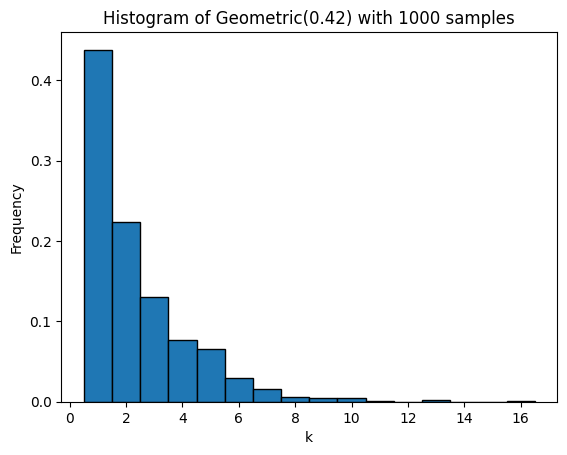

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
p = 0.42
n_samples = 1000

# inversion method for Geometric(p)
u = np.random.uniform(0, 1, n_samples)
samples = np.ceil(np.log(1 - u) / np.log(1 - p)).astype(int)

# plot histogram
plt.hist(samples, bins=np.arange(1, max(samples)+2)-0.5, density=True, edgecolor='black')
plt.title(f'Histogram of Geometric({p}) with {n_samples} samples')
plt.xlabel('k')
plt.ylabel('Frequency')
plt.show()


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.


**Step 1: Compute CDF**

For $0 \leq x \leq 2$:
$$
F(x) = \int_0^x e^{t-2} dt = e^{-2}(e^x - 1).
$$

For $x > 2$:
$$
F(x) = 1 - e^{-x}.
$$

So we get that:
$$
F(x) =
\begin{cases}
0, & x < 0, \\
e^{-2}(e^x - 1), & 0 \leq x \leq 2, \\
1 - e^{-x}, & x > 2.
\end{cases}
$$



**Step 2: Inversion**

- If $0 \leq u \leq 1 - e^{-2}$:
$$
u = e^{-2}(e^x - 1) \quad \Rightarrow \quad x = \ln(1 + ue^2).
$$

- If $1 - e^{-2} < u < 1$:
$$
u = 1 - e^{-x} \quad \Rightarrow \quad x = -\ln(1-u).
$$



**Step 3: Algorithm**

1. Sample $u \sim U(0,1)$.  
2. If $u \leq 1 - e^{-2}$, set $x = \ln(1 + ue^2)$.  
3. Otherwise, set $x = -\ln(1-u)$.  


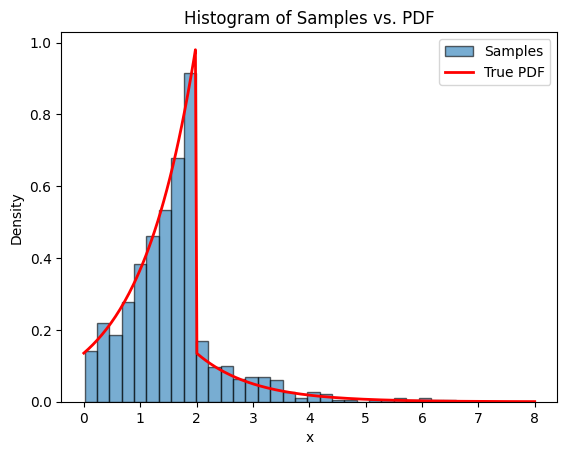

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
n_samples = 1000

# inversion sampler
u = np.random.uniform(0, 1, n_samples)
samples = np.zeros(n_samples)

threshold = 1 - np.exp(-2)

for i in range(n_samples):
    if u[i] <= threshold:
        samples[i] = np.log(1 + u[i] * np.exp(2))
    else:
        samples[i] = -np.log(1 - u[i])

# histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, edgecolor='black', label='Samples')

# overlay the pdf
x_vals = np.linspace(0, 8, 300)
pdf_vals = np.where((x_vals >= 0) & (x_vals <= 2), np.exp(x_vals - 2), np.exp(-x_vals))
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='True PDF')

plt.title("Histogram of Samples vs. PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>


**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

Let $g(x) = 1,   0 ≤ x ≤ 1$
---
We need $f(x) ≤ c g(x)$ for all $x ∈ [0,1]. $
Since $g(x)=1$, this is equivalent to finding  

$c = sup_{0 ≤ x ≤ 1} f(x)$.
the maximum occurs at $x=1$:  

$c = f(1) = (5+4+3+1)/4 = 13/4.$

1. Generate $Y \sim \text{Uniform}(0,1)$.  
2. Generate $U \sim \text{Uniform}(0,1)$.  
3. If  

   $U \leq \dfrac{5Y^4 + 4Y^3 + 3Y^2 + 1}{13}$,  

   then **accept** and set $X = Y$.  
   Otherwise, **reject** and return to step 1.


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.
$\mathbb{E}[\text{proposals}] = \frac{1}{p_{\text{accept}}} = c = \tfrac{13}{4}.$


$(13/4)$

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

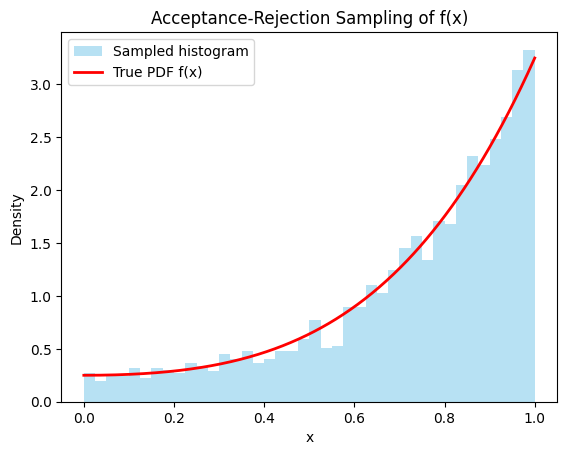

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# target density f(x)
def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/4 * ((x >= 0) & (x <= 1))

# proposal g(x) = Uniform(0,1), so g(x)=1 on [0,1]
# envelope constant c = 13/4
c = 13/4

def sample_X(n_samples=2500):
    samples = []
    while len(samples) < n_samples:
        # proposal from Uniform(0,1)
        y = np.random.rand()
        # uniform for acceptance test
        u = np.random.rand()
        # acceptance probability
        if u <= f(y)/c:
            samples.append(y)
    return np.array(samples)

# generate 2500 samples
samples = sample_X(2500)

# histogram of samples
plt.hist(samples, bins=40, density=True, alpha=0.6, color='skyblue', label='Sampled histogram')

# plot true pdf f(x)
x = np.linspace(0, 1, 500)
plt.plot(x, f(x), 'r-', linewidth=2, label='True PDF f(x)')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance-Rejection Sampling of f(x)')
plt.legend()
plt.show()


histogram closely follows the red curve — confirming that the algorithm is correctly sampling from $f(x)$.

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

### Ans.
We want to sample from the Laplace distribution with pdf

$$
g(x) = \tfrac{1}{2} e^{-|x|}
$$


**Step 1.** Generate $U \sim \text{Uniform}(0,1)$.


**Step 2.** Recall the CDF of the Laplace distribution:

$$
G(x) =
\begin{cases}
\tfrac{1}{2} e^{x}, & x < 0, \\[6pt]
1 - \tfrac{1}{2} e^{-x}, & x \geq 0.
\end{cases}
$$


**Step 3.** Invert the CDF depending on the value of $U$:

- If $U \leq 0.5$ (negative branch):

$$
U = \tfrac{1}{2} e^{x} \quad \Longrightarrow \quad x = \ln(2U).
$$

- If $U > 0.5$ (positive branch):

$$
U = 1 - \tfrac{1}{2} e^{-x}
\quad \Longrightarrow \quad
x = -\ln\!\big(2(1-U)\big).
$$


**Step 4.** The final inversion formula is

$$
X =
\begin{cases}
\ln(2U), & U \leq 0.5, \\[6pt]
-\ln\!\big(2(1-U)\big), & U > 0.5.
\end{cases}
$$

Thus, $X$ is a sample from the Laplace distribution.


In [ ]:
import numpy as np

def laplace_inversion(n, rng=None):
    """
    Generate n i.i.d. samples from Laplace(0, 1) via inverse transform.
    pdf: g(x) = 0.5 * exp(-|x|)
    """
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(n)
    X = np.where(U <= 0.5, np.log(2*U), -np.log(2*(1-U)))
    return X

# example usage
samples = laplace_inversion(10000)
print(samples.mean(), samples.var())


-0.006327828271120479 2.0446298699839054


<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

Sample from the standard normal distribution

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2},
$$

using the Laplace proposal

$$
g(x) = \tfrac{1}{2} e^{-|x|}.
$$

<hr>

**Step 1.** Compute the ratio:

$$
\frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^2/2}}{\tfrac{1}{2} e^{-|x|}}
= \sqrt{\tfrac{2}{\pi}} \, e^{-x^2/2 + |x|}.
$$


**Step 2.** Maximize over $x$.

- For $x \geq 0$: $h(x) = -\tfrac12 x^2 + x$, maximized at $x=1$, giving $h(1)=\tfrac12$.
- For $x < 0$: $h(x) = -\tfrac12 x^2 - x$, maximized at $x=-1$, giving $h(-1)=\tfrac12$.


**Step 3.** Minimal constant $k$:

$$
k^\* = \sup_x \frac{f(x)}{g(x)}
= \sqrt{\tfrac{2}{\pi}} \, e^{1/2}
= \sqrt{\tfrac{2e}{\pi}}
\approx 1.3155.
$$


**Step 4.** Acceptance probability:

$$
\alpha(y) = \frac{f(y)}{k^\* g(y)}
= e^{-y^2/2 + |y| - 1/2}
= \exp\!\Big(-\tfrac12(|y|-1)^2\Big).
$$


**Step 5.** Acceptance–Rejection Algorithm:

1. **Propose** $Y \sim \text{Laplace}(0,1)$ via inverse CDF:
   - Draw $U \sim \text{Unif}(0,1)$.
   - If $U \leq 0.5$, set $Y = \ln(2U)$;  
     else set $Y = -\ln(2(1-U))$.

2. **Accept/Reject:** Draw $V \sim \text{Unif}(0,1)$.
   - If $V \leq \exp\!\big(-\tfrac12(|Y|-1)^2\big)$, accept ($X=Y$).
   - Else reject and repeat.


**Step 6.** Efficiency:

- Expected proposals per accepted sample:

$$
\mathbb{E}[\text{proposals}] = k^\* \approx 1.3155.
$$


used ChatGPT to code implementation below based on the above



Sample mean ~ -0.0001469905539834891
Sample variance ~ 0.991851156391354
Empirical acceptance rate ~ 0.7584261141279617
Theoretical acceptance rate = 0.7601734505331403


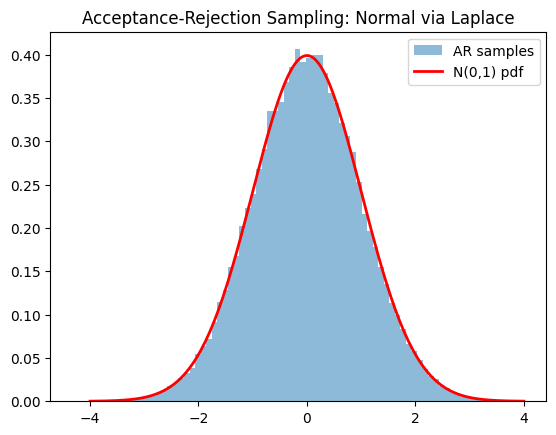

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Optimal k
k_star = np.sqrt(2 * np.e / np.pi)

# Step 1: Laplace(0,1) sampler via inverse transform
def sample_laplace(rng=np.random.default_rng()):
    U = rng.random()
    return np.log(2*U) if U <= 0.5 else -np.log(2*(1-U))

# Step 2: Acceptance-Rejection sampler
def sample_normal_AR(n, rng=np.random.default_rng()):
    samples = []
    trials = 0
    while len(samples) < n:
        y = sample_laplace(rng)
        p_accept = np.exp(-0.5 * (abs(y) - 1)**2)
        trials += 1
        if rng.random() < p_accept:
            samples.append(y)
    return np.array(samples), trials

# Example: generate 50,000 samples
rng = np.random.default_rng(42)
samples, trials = sample_normal_AR(50000, rng)

print("Sample mean ~", samples.mean())
print("Sample variance ~", samples.var())
print("Empirical acceptance rate ~", len(samples) / trials)
print("Theoretical acceptance rate =", 1/k_star)

# Plot histogram vs. true pdf
x = np.linspace(-4, 4, 200)
f = 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

plt.hist(samples, bins=80, density=True, alpha=0.5, label="AR samples")
plt.plot(x, f, 'r-', lw=2, label="N(0,1) pdf")
plt.legend()
plt.title("Acceptance-Rejection Sampling: Normal via Laplace")
plt.show()


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

Average uniforms per accepted sample: 2.614
95% CI for average uniforms: (2.573, 2.655)


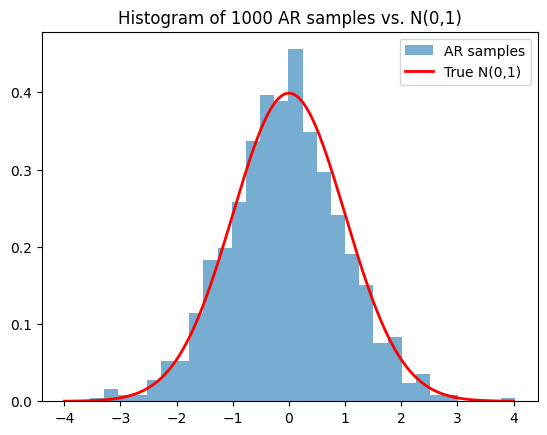

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Optimal k
k_star = np.sqrt(2 * np.e / np.pi)

# Laplace(0,1) sampler via inverse transform
def sample_laplace(rng=np.random.default_rng()):
    U = rng.random()
    return np.log(2*U) if U <= 0.5 else -np.log(2*(1-U))

# Acceptance-Rejection sampler (returns counts of uniforms used)
def sample_normal_AR(n, rng=np.random.default_rng()):
    samples = []
    uniforms_used = 0
    while len(samples) < n:
        # Each Laplace sample uses 1 uniform
        uniforms_used += 1
        y = sample_laplace(rng)

        # Acceptance test uses another uniform
        U = rng.random()
        uniforms_used += 1

        if U <= np.exp(-0.5 * (abs(y) - 1)**2):
            samples.append(y)
    return np.array(samples), uniforms_used

# Generate 1000 samples
rng = np.random.default_rng(123)
samples, uniforms_used = sample_normal_AR(1000, rng)

# Report results
avg_uniforms = uniforms_used / 1000
# Approximate 95% CI for average using normal approximation
# Variance of geometric(k*) is (1-p)/p^2, with p = 1/k_star acceptance rate
p = 1 / k_star
var_per_sample = (1 - p) / (p**2)
se_mean = np.sqrt(var_per_sample / 1000) * 2  # 95% CI ~ ±1.96*SE, close to 2*SE
ci_lower = avg_uniforms - se_mean
ci_upper = avg_uniforms + se_mean

print(f"Average uniforms per accepted sample: {avg_uniforms:.3f}")
print(f"95% CI for average uniforms: ({ci_lower:.3f}, {ci_upper:.3f})")

# Plot histogram vs. true Normal(0,1) density
x = np.linspace(-4, 4, 200)
plt.hist(samples, bins=30, density=True, alpha=0.6, label="AR samples")
plt.plot(x, norm.pdf(x), 'r-', lw=2, label="True N(0,1)")
plt.legend()
plt.title("Histogram of 1000 AR samples vs. N(0,1)")
plt.show()


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

Given the pdf
$$
g(x) = \frac{1}{\pi(1+x^2)}, \quad -\infty < x < \infty.
$$

**Step 1.** Write down the CDF:

$$
G(x) = \frac{1}{\pi} \arctan(x) + \tfrac{1}{2}.
$$


**Step 2.** Invert the CDF.  
If $U \sim U[0,1]$, then

$$
X = G^{-1}(U) = \tan\!\big(\pi(U - \tfrac{1}{2})\big).
$$


**Step 3.** Algorithm (Inversion method):

1. Generate $U \sim \text{Unif}(0,1)$.  
2. Set $X = \tan(\pi(U - 0.5))$.  
3. Return $X$.

**Step 4.** Histogram plotted below


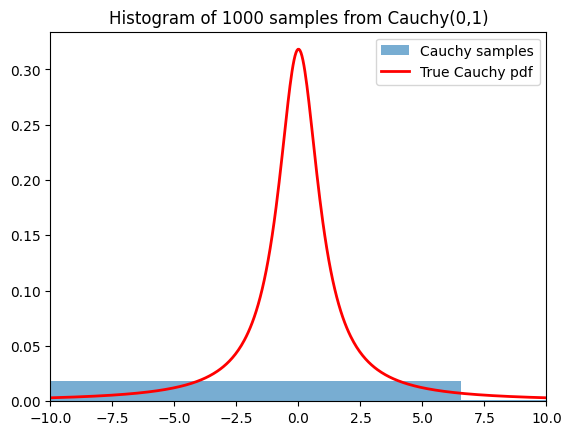

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Inverse transform sampler for Cauchy(0,1)
def sample_cauchy(n, rng=np.random.default_rng()):
    U = rng.random(n)
    return np.tan(np.pi * (U - 0.5))

# Generate 1000 samples
rng = np.random.default_rng(123)
samples = sample_cauchy(1000, rng)

# Plot histogram vs true Cauchy density
x = np.linspace(-10, 10, 500)
g = 1 / (np.pi * (1 + x**2))

plt.hist(samples, bins=50, density=True, alpha=0.6, label="Cauchy samples")
plt.plot(x, g, 'r-', lw=2, label="True Cauchy pdf")
plt.xlim(-10, 10)
plt.legend()
plt.title("Histogram of 1000 samples from Cauchy(0,1)")
plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

For,

$$
g(x) = \frac{1}{\pi(1+x^2)}.
$$

**Step 1.** Compute the ratio:

$$
\frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^2/2}}{\tfrac{1}{\pi(1+x^2)}}
= \sqrt{\tfrac{\pi}{2}} \, (1+x^2) e^{-x^2/2}.
$$


**Step 2.** Maximize over $x$.

- Consider $\ell(x) = \log(1+x^2) - \tfrac{1}{2}x^2$.  
- Critical points: $x=0, \pm 1$.  
- The maximum occurs at $|x|=1$.

Thus,

$$
k^\* = \sqrt{\tfrac{\pi}{2}} \cdot 2 e^{-1/2}
= \sqrt{\tfrac{2\pi}{e}} \;\approx 1.5205.
$$

**Step 3.** Acceptance probability:

$$
\alpha(y) = \frac{f(y)}{k^\* g(y)}
= \frac{1+y^2}{2}\,\exp\!\Big(\tfrac{1-y^2}{2}\Big).
$$

This peaks at $|y|=1$, where $\alpha(y)=1$.


**Step 4.** Efficiency:

- Expected proposals per accepted sample:

$$
\mathbb{E}[\text{proposals}] = k^\* \approx 1.5205.
$$

- Counting uniforms: each proposal uses 2 uniforms (1 for inverse CDF, 1 for accept/reject), so

$$
\mathbb{E}[\text{uniforms}] = 2k^\* \approx 3.041.
$$


**Step 5.** Algorithm (Normal via Cauchy proposal):

1. Propose $Y = \tan(\pi(U_1 - 0.5))$ with $U_1 \sim U[0,1]$.  
2. Draw $U_2 \sim U[0,1]$.  
3. Accept $Y$ if $U_2 \leq \alpha(Y)$; otherwise reject and resample.  
4. Accepted values $X$ follow $\mathcal{N}(0,1)$.



Average U(0,1) draws per accepted sample: 3.030
95% CI (empirical): (3.030, 3.030)
Theoretical expectation 2*k*: 3.041   (acceptance rate ~ 0.6577)


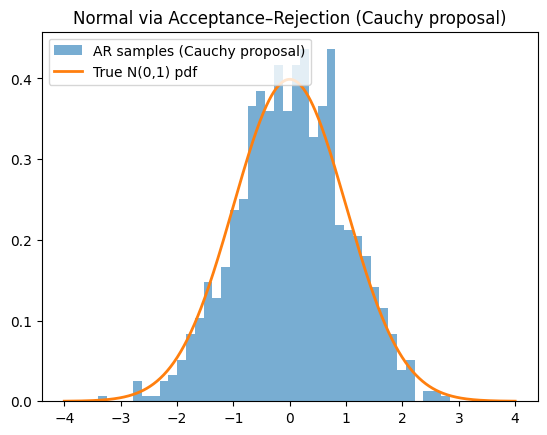

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, e, sqrt
from scipy.stats import norm

# ----- Parameters and helpers -----
k_star = sqrt(2 * pi / e)  # optimal envelope constant for Normal via Cauchy proposal

def sample_cauchy(n, rng=np.random.default_rng()):
    """Inverse-CDF sampler for Cauchy(0,1)."""
    U = rng.random(n)
    return np.tan(np.pi * (U - 0.5)), n  # returns samples and #uniforms used

def accept_prob(y):
    """Pointwise acceptance probability alpha(y) = ((1+y^2)/2) * exp((1 - y^2)/2)."""
    return 0.5 * (1.0 + y*y) * np.exp(0.5 * (1.0 - y*y))

def normal_via_cauchy_AR(n, rng=np.random.default_rng()):
    """
    Acceptance–Rejection sampler for N(0,1) using Cauchy(0,1) proposal.
    Returns: samples, total_uniforms_used, uniforms_per_sample (list length n)
    """
    out = np.empty(n)
    uniforms_per_sample = []
    i = 0
    total_uniforms = 0

    while i < n:
        # Propose from Cauchy via inversion (1 uniform)
        y, u_count = sample_cauchy(1, rng)
        y = y[0]
        total_uniforms += u_count

        # Acceptance test (1 uniform)
        U = rng.random()
        total_uniforms += 1

        if U <= accept_prob(y):
            out[i] = y
            uniforms_per_sample.append(u_count + 1)  # count for this accepted sample
            i += 1

    return out, total_uniforms, np.array(uniforms_per_sample)

# ----- Generate 1000 samples -----
rng = np.random.default_rng(2025)
samples, total_uniforms, uniforms_per_sample = normal_via_cauchy_AR(1000, rng)

# ----- Report average # of U(0,1) per sample + 95% CI (empirical, CLT) -----
avg_uniforms = total_uniforms / len(samples)
# use sample variance of per-sample uniforms for robust CI
s2 = uniforms_per_sample.var(ddof=1)
se = np.sqrt(s2 / len(samples))
ci_lower = avg_uniforms - 1.96 * se
ci_upper = avg_uniforms + 1.96 * se

print(f"Average U(0,1) draws per accepted sample: {avg_uniforms:.3f}")
print(f"95% CI (empirical): ({ci_lower:.3f}, {ci_upper:.3f})")
print(f"Theoretical expectation 2*k*: {2*k_star:.3f}   (acceptance rate ~ {1/k_star:.4f})")

# ----- Plot histogram vs true N(0,1) pdf -----
x = np.linspace(-4, 4, 400)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2)

plt.hist(samples, bins=40, density=True, alpha=0.6, label="AR samples (Cauchy proposal)")
plt.plot(x, pdf, lw=2, label="True N(0,1) pdf")
plt.title("Normal via Acceptance–Rejection (Cauchy proposal)")
plt.legend()
plt.show()
